In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\T\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [1]:
pip install dash

  Obtaining dependency information for dash from https://files.pythonhosted.org/packages/27/ad/7047095224013ec2ae37ba8ece5956773e7953c39a3af5aa20d821ed99aa/dash-2.17.1-py3-none-any.whl.metadata
  Obtaining dependency information for dash-html-components==2.0.0 from https://files.pythonhosted.org/packages/75/65/1b16b853844ef59b2742a7de74a598f376ac0ab581f0dcc34db294e5c90e/dash_html_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-core-components==2.0.0 from https://files.pythonhosted.org/packages/00/9e/a29f726e84e531a36d56cff187e61d8c96d2cc253c5bcef9a7695acb7e6a/dash_core_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-table==5.0.0 from https://files.pythonhosted.org/packages/da/ce/43f77dc8e7bbad02a9f88d07bf794eaf68359df756a28bb9f2f78e255bb1/dash_table-5.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for retrying from https://files.pythonhosted.org/packages/8f/04/9e36f28be4c0532c0e9207ff9dc01fb

In [2]:
#31 Jan 2023 to 30 May 2024

training_data = pd.read_csv('DXY_training_data.csv')

In [3]:
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-31,102.190002,102.610001,102.010002,102.099998,102.099998,0.0
1,2023-02-01,102.099998,102.190002,101.040001,101.220001,101.220001,0.0
2,2023-02-02,100.849998,101.910004,100.820000,101.750000,101.750000,0.0
3,2023-02-03,101.830002,103.010002,101.550003,102.919998,102.919998,0.0
4,2023-02-05,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
training_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
374,2024-04-24,105.690002,105.949997,105.589996,105.860001,105.860001,0.0
375,2024-04-25,105.820000,106.000000,105.510002,105.599998,105.599998,0.0
376,2024-04-26,105.580002,106.190002,105.410004,105.940002,105.940002,0.0
377,2024-04-28,NaN,NaN,NaN,NaN,NaN,NaN
378,2024-04-29,106.080002,106.080002,105.459999,105.580002,105.580002,0.0


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       379 non-null    object 
 1   Open       313 non-null    float64
 2   High       313 non-null    float64
 3   Low        313 non-null    float64
 4   Close      313 non-null    float64
 5   Adj Close  313 non-null    float64
 6   Volume     313 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.9+ KB


In [6]:
training_data = training_data.dropna(axis = 0, how ='any')  

In [7]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 0 to 378
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       313 non-null    object 
 1   Open       313 non-null    float64
 2   High       313 non-null    float64
 3   Low        313 non-null    float64
 4   Close      313 non-null    float64
 5   Adj Close  313 non-null    float64
 6   Volume     313 non-null    float64
dtypes: float64(6), object(1)
memory usage: 19.6+ KB


C:\Users\T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\T\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

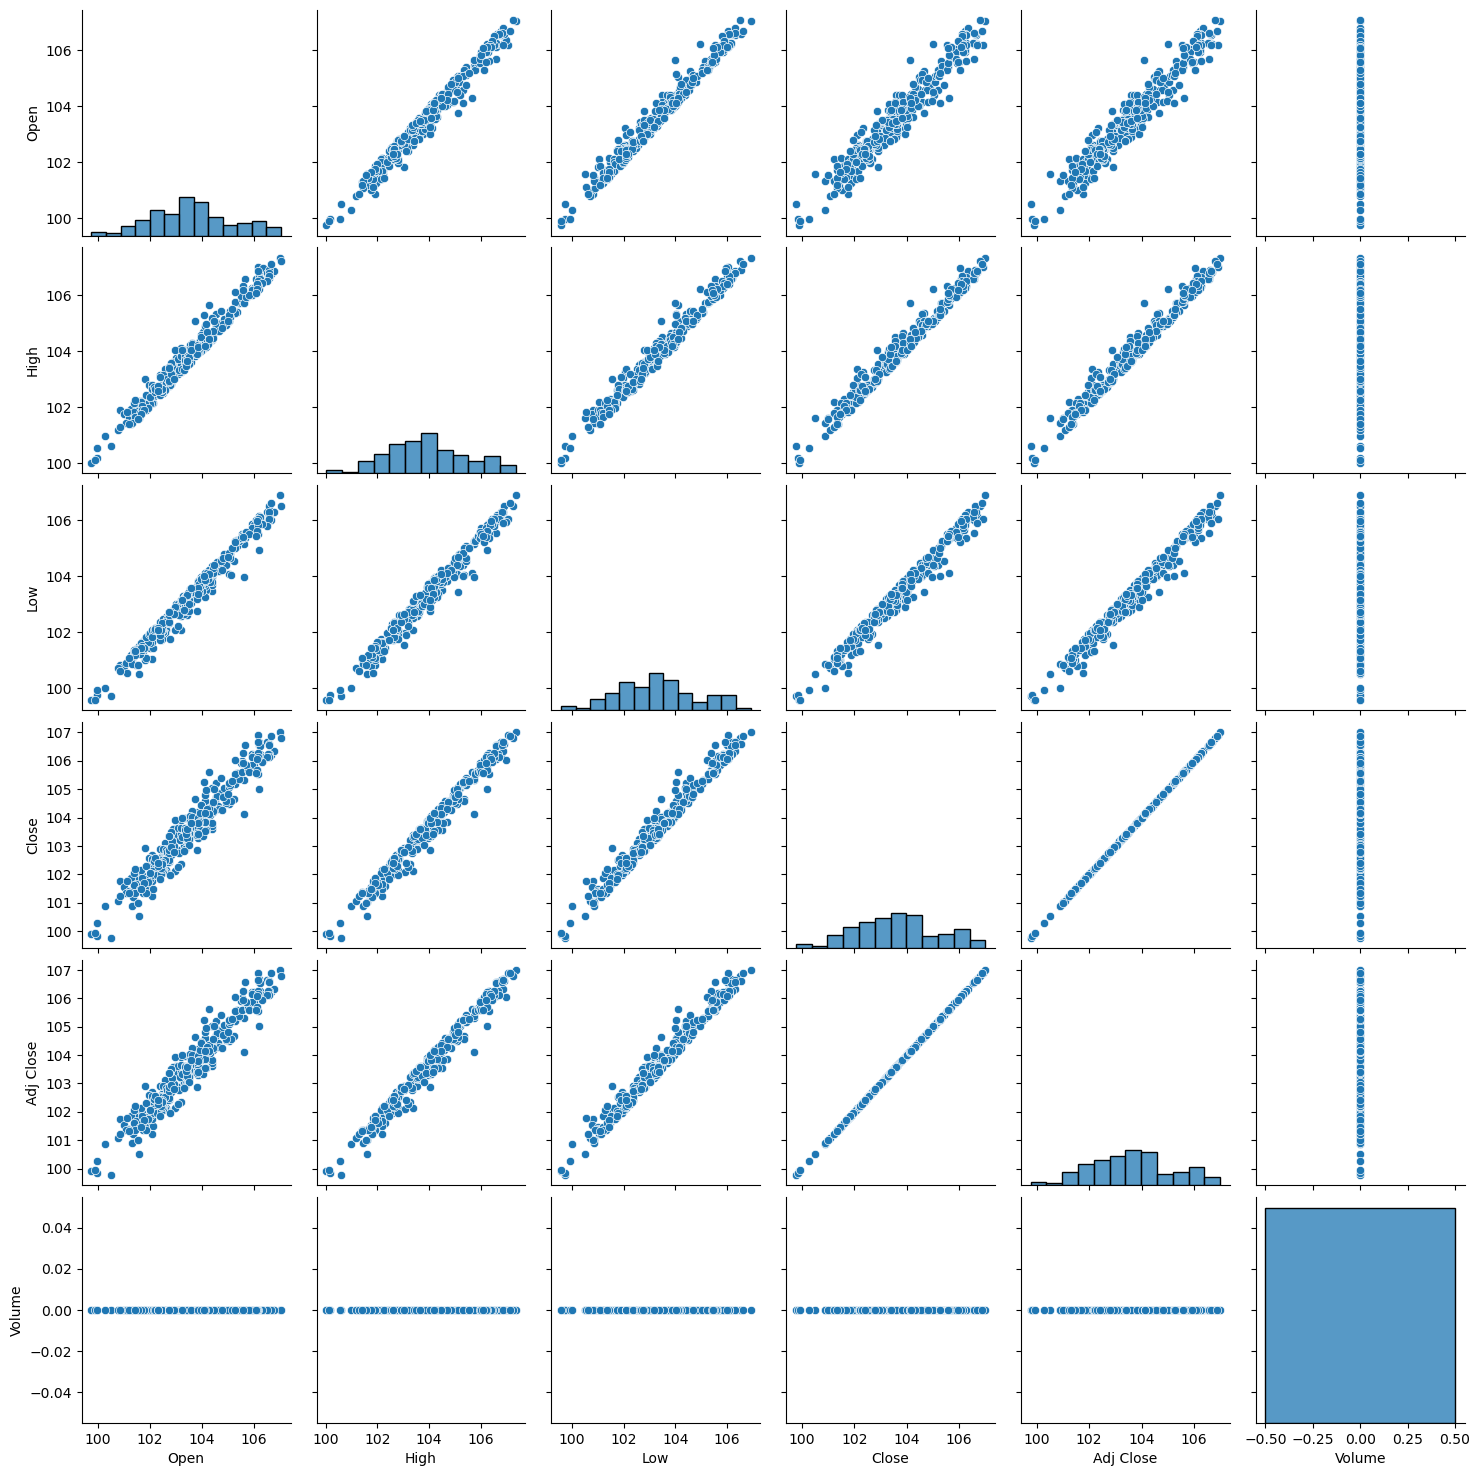

In [8]:
sns.pairplot(training_data)

In [9]:
training_data = training_data.iloc[:, 4].values  ##this will store the data in a numpy array ##NN needs to be an array

In [10]:
type(training_data) ##check the type of data

numpy.ndarray

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler() ###because the data is linearly correlated -- makes it easier for the model to manage 

In [13]:
training_data = scaler.fit_transform(training_data.reshape(-1, 1)) ##application of scaler to the data, the scaler range is -1 to 1

In [14]:
##you don't do normal x and y train because it collects random data, the data needs to be in a sequential order

x_training_data = []##independent variable

y_training_data =[]##dependent

In [15]:
###loop through put one day into dependent variable then 40 will be added as independent variable.

for i in range(40, len(training_data)):
    x_training_data.append(training_data[i-40:i, 0])##40 prior to where i am and taking being stored to x
    y_training_data.append(training_data[i, 0])### y training data

In [16]:
##put both lists into a numpy array
x_training_data = np.array(x_training_data)

y_training_data = np.array(y_training_data)

In [17]:
print(x_training_data.shape)##40 days

print(y_training_data.shape)##y is just one feature so it contains rows of data ##each of the values  ##you have to use the x train and y train to predict

(273, 40)
(273,)


In [18]:
##need to add an additional dimension because this is required for tensor flow

x_training_data = np.reshape(x_training_data, (x_training_data.shape[0],

                                               x_training_data.shape[1],

                                               1))

In [19]:
print(x_training_data.shape)

(273, 40, 1)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [21]:
rnn = Sequential() ##initialising/naming rnn

In [22]:
rnn.add(LSTM(units = 40, return_sequences = True, input_shape = (x_training_data.shape[1], 1)))###no activation function because LSTM defaults to an activation function
##input neurons 40 which is one for each day.
##return sequence true is what makes it recurrent
##increase to 45 to increase the dimesionality


C:\Users\T\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
rnn.add(Dropout(0.2))##the droput layer drops some data to help with overfitting and the exploding gradient issue

In [24]:
rnn.add(LSTM(units = 45, return_sequences = True))

rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 45, return_sequences = True))

rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 45))

rnn.add(Dropout(0.2))###final layer never uses the return sequence that makes it recurrent

##activation function is default is tanh

In [25]:
rnn.add(Dense(units = 1)) ###specifies the number of required outputs -- which is the next day stock price

In [26]:
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [27]:
rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 32)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - loss: 0.2047
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0474
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0403
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0346
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0338
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0301
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0290
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0247
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0203
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0223
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0217
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0243
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0252
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0202
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0231
Epoch 16/100
9/9 

In [28]:
##lets test the model

test_data = pd.read_csv('DXY_test_data.csv')###next 20 days

In [29]:
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-04-29,106.080002,106.080002,105.459999,105.580002,105.580002,0.0
1,2024-04-30,105.669998,106.349998,105.669998,106.220001,106.220001,0.0
2,2024-05-01,106.320000,106.489998,105.440002,105.760002,105.760002,0.0
3,2024-05-02,105.730003,105.900002,105.300003,105.300003,105.300003,0.0
4,2024-05-03,105.309998,105.370003,104.519997,105.029999,105.029999,0.0


In [30]:
test_data = test_data.dropna(axis = 0, how ='any') 

In [31]:
test_data = test_data.iloc[:, 4].values

In [32]:
print(test_data.shape)

(20,)


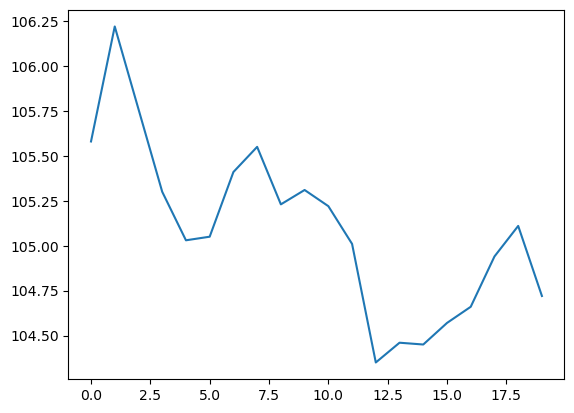

In [33]:
plt.plot(test_data)##change in data for the test data

In [34]:
unscaled_training_data = pd.read_csv('DXY_training_data.csv')

unscaled_test_data = pd.read_csv('DXY_test_data.csv')

In [35]:
unscaled_training_data = unscaled_training_data.dropna(axis = 0, how ='any') 
unscaled_test_data = unscaled_test_data.dropna(axis = 0, how ='any') 



In [36]:
all_data=pd.concat((unscaled_training_data['Close'],unscaled_test_data['Close']), axis = 0)

In [37]:
x_test_data = all_data[len(all_data) - len(test_data) - 40:].values

In [38]:
len(x_test_data)

60

In [39]:
x_test_data = np.reshape(x_test_data, (-1, 1))

In [40]:
x_test_data = scaler.transform(x_test_data)

In [41]:
final_x_test_data = []

for i in range(40, len(x_test_data)):###index 40 is observation 41 because we start at 0

    final_x_test_data.append(x_test_data[i-40:i, 0])##41st variable and saving in the y variable

final_x_test_data = np.array(final_x_test_data)


In [42]:
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], final_x_test_data.shape[1],1))

In [43]:
predictions = rnn.predict(final_x_test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


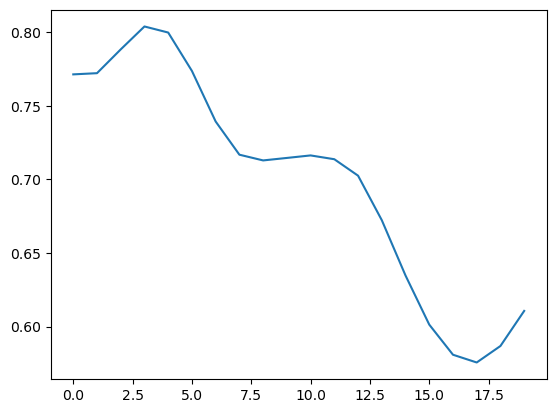

In [44]:
plt.plot(predictions)

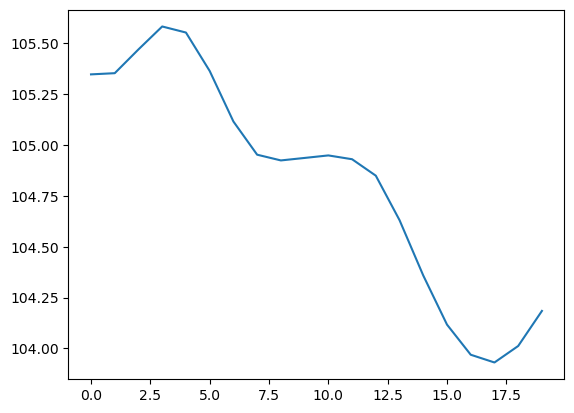

In [45]:
unscaled_predictions = scaler.inverse_transform(predictions)##you have to unscale data that you-ve scaleed using the inverse transformation

plt.plot(unscaled_predictions)


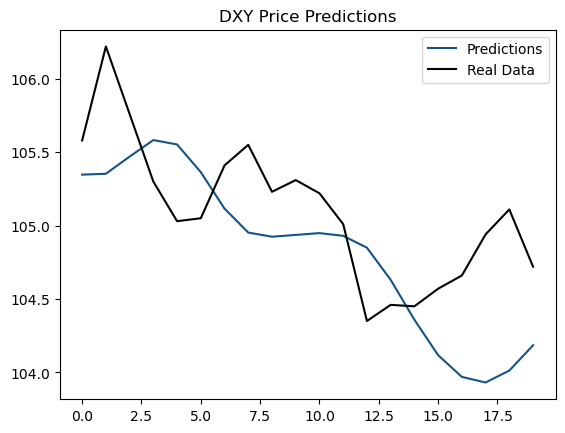

In [46]:
plt.plot(unscaled_predictions, color = '#135485', label = "Predictions")

plt.plot(test_data, color = 'black', label = "Real Data")

plt.title('DXY Price Predictions')

plt.legend()






In [47]:
print("The last trading day price prediction is for April 2024 is: ",unscaled_predictions[0])
print("The real last trading day price for May 2024 is: ",test_data[0])

The last trading day price prediction is for April 2024 is:  [105.34711]
The real last trading day price for May 2024 is:  105.580002


In [48]:
print(unscaled_predictions)

[[105.34711 ]
 [105.35294 ]
 [105.46985 ]
 [105.58247 ]
 [105.55267 ]
 [105.363914]
 [105.115486]
 [104.95238 ]
 [104.924225]
 [104.93643 ]
 [104.94881 ]
 [104.9301  ]
 [104.84929 ]
 [104.63071 ]
 [104.35868 ]
 [104.117386]
 [103.96932 ]
 [103.931274]
 [104.012314]
 [104.184654]]


In [49]:
#pip install streamlit

In [4]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px

C:\Users\T\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
app = dash.Dash(_name_)
app.layout = html.Div([
    html.H1('Dash Demo'),
    dcc.Graph(id='graph'),
    html.Label([
        id='colorscale-dropdown', clearable =False,
        value ='plasma', options =[
            
        ]
        
        
        
    ])
                      
                      ])

In [50]:
import streamlit as st

In [51]:
st.pyplot

st.write("The last trading day price prediction is for April 2024 is:", unscaled_predictions[0])
st.write("The real last trading day price for May 2024 is:", test_data[0])



2024-07-08 19:14:16.767 
  command:

    streamlit run C:\Users\T\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
